In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
# petal length, petal width
X = iris.data[:, [2, 3]]
y = iris.target
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 2)
y shape: (150,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 13,
    stratify = y
)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")


X_train: (120, 2)
X_test: (30, 2)


In [6]:
clf = DecisionTreeClassifier(
    random_state = 13,
    max_depth = 2
)
clf.fit(X_train, y_train)

train_acc = accuracy_score(
    y_train,
    clf.predict(X_train)
)
test_acc = accuracy_score(
    y_test,
    clf.predict(X_test)
)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.95
Test Accuracy: 0.9666666666666667


In [7]:
import numpy as np
import matplotlib.pyplot as plt

y_test_pred = clf.predict(X_test)

print(f"Predicted: {y_test_pred[:5]}")
print(f"Actual : {y_test[:5]}")

Predicted: [2 1 2 2 0]
Actual : [2 1 2 2 0]


In [9]:
x_min, x_max = X[:, 0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:, 0].min() - 0.5, X[:,0].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300),
)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [10]:
wrong = y_test_pred != y_test
print(f"Misclassified samples: {np.sum(wrong)}")


Misclassified samples: 1


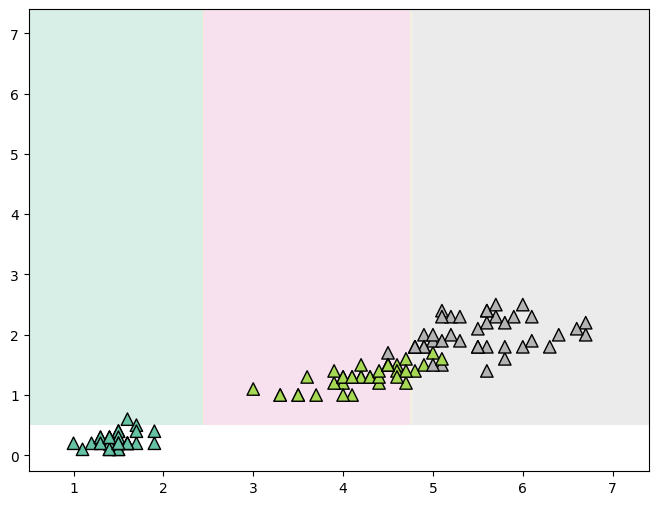

In [13]:
plt.figure(figsize = (8,6))

plt.contourf(xx, yy, Z, alpha = 0.25, cmap = "Set2")

plt.scatter(
    X_train[:, 0], X_train[:,1],
    c=y_train, cmap = "Set2",
    marker = "^", s = 80,
    edgecolor ="k", label = "Test"
)

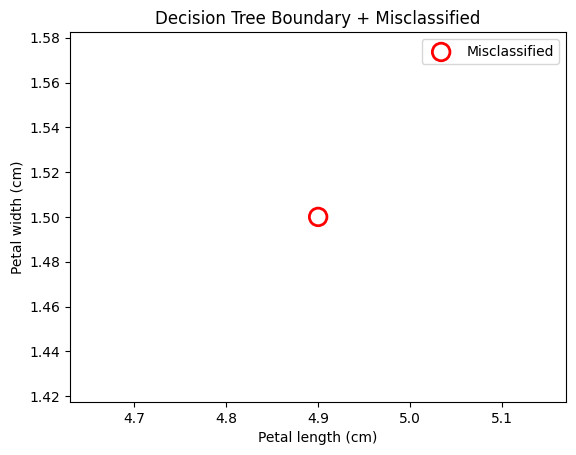

In [14]:
plt.scatter(
    X_test[wrong, 0], X_test[wrong, 1],
    facecolors = "none",
    edgecolors = "red",
    s = 160,
    linewidths = 2,
    label = "Misclassified"
)

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Decision Tree Boundary + Misclassified")
plt.legend()
plt.show()

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [16]:
iris = load_iris()
# petal length, petal width
X = iris.data[:, [2, 3]]
y = iris.target
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 2)
y shape: (150,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2,
random_state=13,
stratify=y
)
# 데이터 크기 확인
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (120, 2)
X_test: (30, 2)


In [18]:
# 결정트리 분류기 생성 (최대 깊이 제한)
clf = DecisionTreeClassifier(
random_state=13,
max_depth=2
)
# 모델 학습 (Training)
# fit(특성_데이터, 정답_데이터)
clf.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",13
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [19]:
train_acc = accuracy_score(
y_train,
clf.predict(X_train)
)
test_acc = accuracy_score(
y_test,
clf.predict(X_test)
)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.95
Test Accuracy: 0.9666666666666667


In [20]:
import numpy as np
import matplotlib.pyplot as plt
# Test 데이터에 대한 예측값 생성
y_test_pred = clf.predict(X_test)
# 예측 결과 확인 (상위 5개)
print(f"Predicted: {y_test_pred[:5]}")
print(f"Actual : {y_test[:5]}")

Predicted: [2 1 2 2 0]
Actual : [2 1 2 2 0]


In [21]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(
np.linspace(x_min, x_max, 300),
np.linspace(y_min, y_max, 300)
)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [22]:
wrong = y_test_pred != y_test
# 오분류된 데이터의 개수 확인
print(f"Misclassified samples: {np.sum(wrong)}")
# 결과 예시:
# Misclassified samples: 1

Misclassified samples: 1


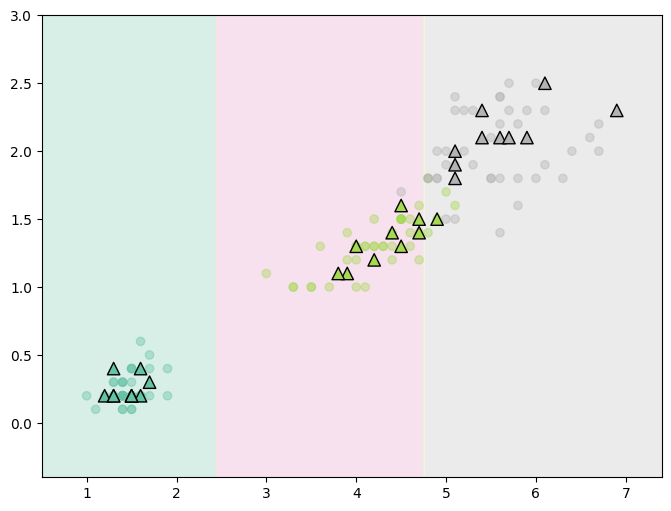

In [23]:
plt.figure(figsize=(8, 6))
# 1) 결정경계 (배경)
plt.contourf(xx, yy, Z, alpha=0.25, cmap="Set2")
# 2) Train 데이터
plt.scatter(
X_train[:, 0], X_train[:, 1],
c=y_train, cmap="Set2",
alpha=0.4, label="Train"
)
# 3) Test 데이터
plt.scatter(
X_test[:, 0], X_test[:, 1],
c=y_test, cmap="Set2",
marker="^", s=80,
edgecolor="k", label="Test"
)

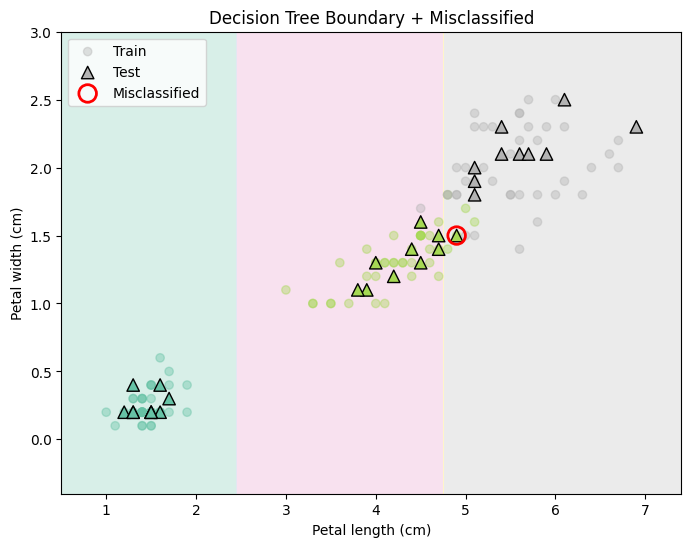

In [25]:
plt.figure(figsize=(8, 6))
# 1) 결정경계 (배경)
plt.contourf(xx, yy, Z, alpha=0.25, cmap="Set2")
# 2) Train 데이터
plt.scatter(
X_train[:, 0], X_train[:, 1],
c=y_train, cmap="Set2",
alpha=0.4, label="Train"
)
# 3) Test 데이터
plt.scatter(
X_test[:, 0], X_test[:, 1],
c=y_test, cmap="Set2",
marker="^", s=80,
edgecolor="k", label="Test"
)

# 4) 틀린 데이터 강조
plt.scatter(
X_test[wrong, 0], X_test[wrong, 1],
facecolors="none",
edgecolors="red",
s=160,
linewidths=2,
label="Misclassified"
)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Decision Tree Boundary + Misclassified")
plt.legend()
plt.show()